In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
from keras.models import Model
import random

Using TensorFlow backend.


In [ ]:
np.random.seed(0)

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

print(X_train)
print(X_test.shape)

#avoid the error assertion , it means that the amount of training data is equaled to the label
assert(X_train.shape[0]==y_train.shape[0]),"The number of images is not equal to the number of label"
assert(X_test.shape[0]==y_test.shape[0]),"The number of images is not equal to the number of label"
assert(X_train.shape[1:]==(28,28)),"The dimension of the images are not 28 x 28"
assert(X_test.shape[1:]==(28,28)),"The dimension of the images are not 28x28"

11493376/11490434 [==============================] - 1s 0us/step
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(10000, 28, 28)


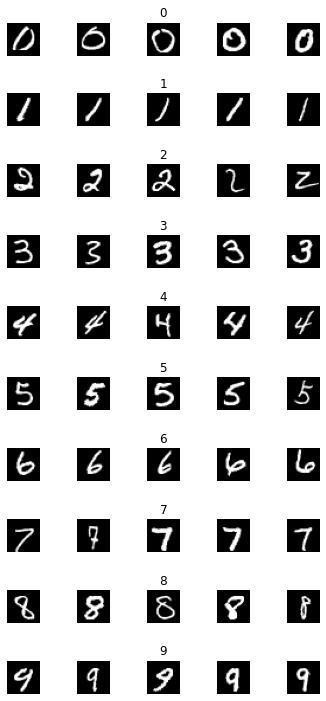

In [ ]:
num_of_samples=[]

cols=5
num_classes=10

fig,axs = plt.subplots(nrows= num_classes, ncols= cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected= X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected)-1)),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        
        if(i==2):
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


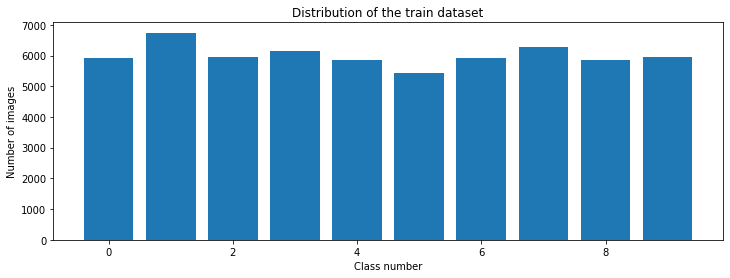

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train= X_train.reshape(60000, 28,28,1)
X_test= X_test.reshape(10000, 28, 28,1)
# print(X_train)

In [ ]:
y_train= to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
#define the LeNet_model function
def leNet_model():
  model=Sequential()
  model.add(Conv2D(30, (5,5),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))  #reduce overfitting
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss="categorical_crossentropy",metrics=['accuracy'])
  return model


In [ ]:
model = leNet_model()
print(model.summary())

RuntimeError: ignored

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle='True')

NameError: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('accuracy')
plt.xlabel('epoch')

In [ ]:
import requests
from PIL import Image
url ='https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream=True)
# print(response)
img= Image.open(response.raw)
plt.imshow(img)

In [ ]:
import cv2

img_array= np.asarray(img) 
resized= cv2.resize(img_array,(28,28))
gray_scale=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY) #to make into 1 channel gray color 
image = cv2.bitwise_not(gray_scale)  #inverse color
plt.imshow(image,cmap=plt.get_cmap("gray")) 


# print(image)

In [ ]:
#normalize image
image= image/255
image= image.reshape(1,28,28,1)
# print(image)

In [ ]:
prediction = model.predict_classes(image)
print('prediction is' , str(prediction))

In [ ]:
score = model.evaluate(X_test,y_test, verbose=0)
print(type(score))
print("test score:",score[0])
print("test accuracy:",score[1])

In [ ]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
 
print(visual_layer1.shape)
print(visual_layer2.shape)

In [ ]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.imshow(visual_layer1[0,:,:,i],cmap=plt.get_cmap('jet'))
  plt.axis('off')

In [ ]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(visual_layer2[0,:,:,i],cmap=plt.get_cmap('jet'))
  plt.axis('off')